torch实战

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [5]:
import torch
import matplotlib.pyplot as plt

# 定义 sigmoid 函数
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# 初始化变量
x1 = torch.tensor(0.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)

# 计算图中的节点
v0 = x1**2
v1 = 2*x2
v2 = v0 + v1 + 1
v3 = sigmoid(v2)
v4 = 3*v3
v5 = v4 + sigmoid(v2) + 1
y = sigmoid(v5)

# 对所有需要计算梯度的节点调用 retain_grad()
x1.retain_grad()
x2.retain_grad()
v0.retain_grad()
v1.retain_grad()
v2.retain_grad()
v3.retain_grad()
v4.retain_grad()
v5.retain_grad()

# 计算梯度
y.backward()

# 打印梯度
print("梯度:")
print(f"x1: {x1.grad}")
print(f"x2: {x2.grad}")
print(f"v0: {v0.grad}")
print(f"v1: {v1.grad}")
print(f"v2: {v2.grad}")
print(f"v3: {v3.grad}")
print(f"v4: {v4.grad}")
print(f"v5: {v5.grad}")

梯度:
x1: 0.0
x2: 0.002896492835134268
v0: 0.001448246417567134
v1: 0.001448246417567134
v2: 0.001448246417567134
v3: 0.02404305338859558
v4: 0.00801435112953186
v5: 0.00801435112953186


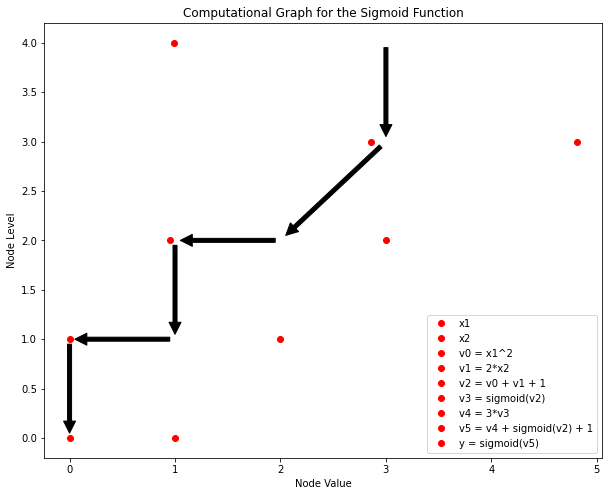

In [6]:
# 绘制计算图
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制节点
ax.plot(x1.item(), 0, 'ro', label='x1')
ax.plot(x2.item(), 0, 'ro', label='x2')
ax.plot(v0.item(), 1, 'ro', label='v0 = x1^2')
ax.plot(v1.item(), 1, 'ro', label='v1 = 2*x2')
ax.plot(v2.item(), 2, 'ro', label='v2 = v0 + v1 + 1')
ax.plot(v3.item(), 2, 'ro', label='v3 = sigmoid(v2)')
ax.plot(v4.item(), 3, 'ro', label='v4 = 3*v3')
ax.plot(v5.item(), 3, 'ro', label='v5 = v4 + sigmoid(v2) + 1')
ax.plot(y.item(), 4, 'ro', label='y = sigmoid(v5)')

# 绘制箭头
ax.annotate('', xy=(0, 0), xytext=(0, 1), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(0, 1), xytext=(1, 1), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(1, 1), xytext=(1, 2), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(1, 2), xytext=(2, 2), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(2, 2), xytext=(3, 3), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(3, 3), xytext=(3, 4), arrowprops=dict(facecolor='black', shrink=0.05))

# 设置图例和标签
ax.legend()
ax.set_title('Computational Graph for the Sigmoid Function')
ax.set_xlabel('Node Value')
ax.set_ylabel('Node Level')

# 显示图形
plt.show()